In [5]:
import numpy as np
import matplotlib.pyplot as plt

data_file = "outputs/bert_base.eval_out.npy"

with open(data_file, "rb") as f:
    data_dicts = np.load(f).item().get("data_dicts")

In [42]:
def top_k_idxs(a, top_k):
    return np.argpartition(a, -top_k)[-top_k:]

def distance_expt(data_dicts, top_k=1):
    distances = []
    for data_dict in data_dicts:
        top_span_starts = data_dict["top_span_starts"]
        top_antecedents = data_dict["top_antecedents"]
        top_antecedent_scores = data_dict["top_antecedent_scores"]
        
        for anaphor_span_idx in range(top_span_starts.shape[0]):
            best_anteced_arr_idxs = top_k_idxs(top_antecedent_scores[anaphor_span_idx], top_k)
            for best_anteced_arr_idx in best_anteced_arr_idxs:
                best_anteced_arr_idx -= 1
                if best_anteced_arr_idx < 0:
                    continue
                best_anteced_span_idx = top_antecedents[anaphor_span_idx][best_anteced_arr_idx]
                distance = top_span_starts[anaphor_span_idx] - top_span_starts[best_anteced_span_idx]
                distances.append(distance)
    return distances

def avg_dist_among_top_k_expt(data_dics, top_k):
    avg_distances = []
    for data_dict in data_dicts:
        top_span_starts = data_dict["top_span_starts"]
        top_antecedents = data_dict["top_antecedents"]
        top_antecedent_scores = data_dict["top_antecedent_scores"]
        
        for anaphor_span_idx in range(top_span_starts.shape[0]):
            best_anteced_arr_idxs = top_k_idxs(top_antecedent_scores[anaphor_span_idx], top_k)
            sum_distances = 0
            num_distances = 0
            if np.argmax(top_antecedent_scores[anaphor_span_idx]) == 0:
                continue
            for best_anteced_arr_idx in best_anteced_arr_idxs:
                best_anteced_arr_idx -= 1
                if best_anteced_arr_idx < 0:
                    continue
                best_anteced_span_idx = top_antecedents[anaphor_span_idx][best_anteced_arr_idx]
                distance = top_span_starts[anaphor_span_idx] - top_span_starts[best_anteced_span_idx]
                sum_distances += distance
                num_distances += 1
            avg_distances.append(sum_distances / num_distances)
    return avg_distances

def find_percentage_above(length, distances):
    d = np.array(distances)
    return np.sum(d > length) / len(distances)

[4, 18, 15, 3, 36, 68, 74, 8, 5, 42, 87, 31, 158, 70, 38, 7, 32, 140, 205, 17, 171, 3, 40, 21, 22, 40, 4, 89, 66, 50, 35, 128, 55, 17, 63, 68, 35, 5, 12, 350, 402, 466, 15, 15, 20, 39, 83, 90, 174, 146, 26, 54, 114, 92, 98, 145, 156, 28, 14, 48, 31, 26, 45, 20, 7, 11, 105, 12, 118, 5, 26, 9, 39, 14, 4, 4, 93, 47, 47, 24, 11, 48, 54, 12, 25, 105, 165, 126, 144, 20, 12, 14, 12, 18, 18, 43, 11, 32, 46, 208, 9, 67, 38, 229, 14, 248, 301, 344, 356, 35, 27, 5, 29, 26, 196, 15, 80, 8, 9, 5, 8, 54, 16, 7, 17, 26, 110, 12, 95, 12, 13, 16, 9, 22, 13, 23, 68, 28, 14, 26, 85, 3, 3, 22, 27, 96, 148, 11, 30, 87, 97, 84, 231, 30, 13, 151, 51, 54, 52, 132, 24, 9, 148, 174, 405, 208, 22, 33, 96, 6, 103, 115, 5, 177, 58, 126, 241, 137, 258, 151, 166, 103, 182, 200, 197, 205, 220, 16, 233, 358, 6, 202, 152, 19, 426, 418, 309, 317, 134, 104, 13, 9, 4, 9, 47, 3, 8, 15, 12, 6, 17, 17, 81, 7, 20, 7, 10, 15, 38, 44, 14, 11, 21, 14, 13, 8, 9, 27, 11, 35, 7, 12, 49, 13, 3, 49, 4, 26, 34, 2, 4, 7, 9, 71, 32, 70,

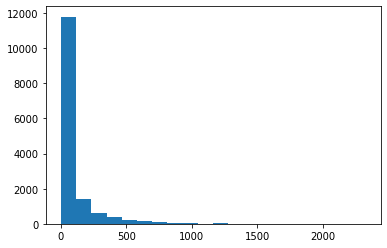

In [43]:
distances = distance_expt(data_dicts)
print(distances)
plt.hist(distances, bins=20)
plt.show()

In [28]:
print("max distance:", max(distances))
print("percentage above 500:", find_percentage_above(512, distances))
print("percentage above 80:", find_percentage_above(80, distances))

max distance: 2325
percentage above 500: 0.03678839957035446
percentage above 80: 0.27040816326530615


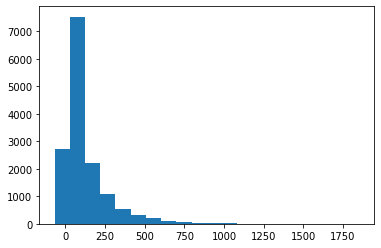

In [46]:
avg_distances = avg_dist_among_top_k_expt(data_dicts, 5)
plt.hist(avg_distances, bins=20)
plt.show()

In [45]:
print("percentage above 500:", find_percentage_above(512, avg_distances))
print("percentage above 80:", find_percentage_above(80, avg_distances))

max distance: 1850.5
percentage above 500: 0.03269334049409237
percentage above 80: 0.4376342642320086
